<a href="https://colab.research.google.com/github/amccnnll/temp/blob/main/Working_Group_8_ID5059_Coursework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursework 2 - Credit Card Fraud Detection**
## Group 8

## 1. Data Exploration
### 1.1 Initialisation

Import relevant packages and data set

In [3]:
# This section is just for loading data on google colab because it doens't want to load the normal way
import pandas as pd
trainingdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
testdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# ensure all columns shown
pd.set_option('display.max_columns', None)

# import data
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
df_train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


### 1.2 Data Exploration

Look at summary of data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

Class requires converting to Boolean

In [6]:
df_train.Class = df_train.Class.replace({1: True, 0: False})

Get summary statistics for data

In [7]:
df_train.describe(include = "all")

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218660
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,NaN
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,NaN
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,NaN
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,NaN
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,NaN
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,NaN


Initial comments:
 - Unlabelled predictors have undergone Principal Component Analysis (PCA)
 - All unlabelled predictors are decimal numbers
 - All unlabelled predictors include positive and negative values
 - Time and Amount are decimal numbers
 - Time and Amount are non-negative values
 - Class has 218660 0 values (legitimate) and 469 1 values (fraudulent)
 - id is not a relevant predictor

Plot histograms of data

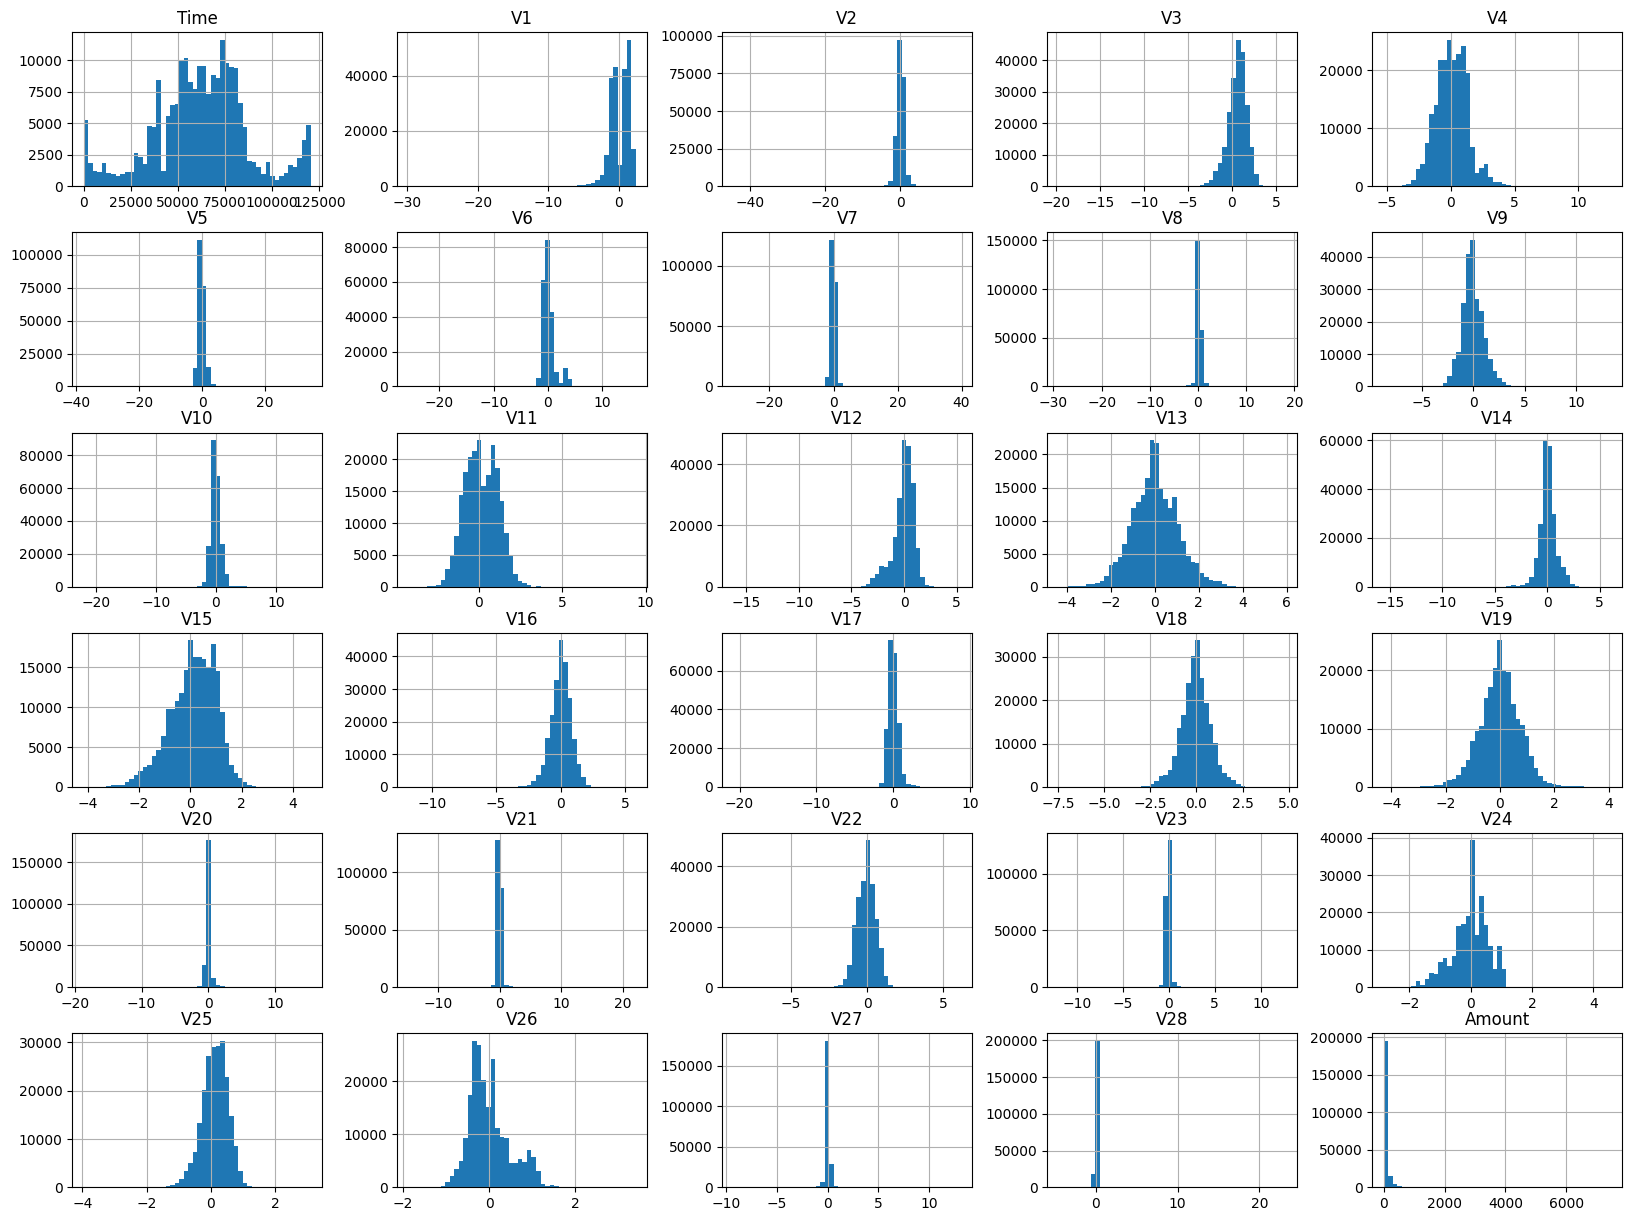

In [8]:
%matplotlib inline
df_train.loc[:, ~df_train.columns.isin(["id", "Class"])].hist(bins = 50, figsize = (20, 15))
plt.show()

Comments on histograms:
 - All unlabelled predictors have approximate normal distribution (due to PCA)
 - Unlabelled predictors are broadly in two categories: higher standard deviation and low standard deviation
 - The Amount predictor is strongly positively skewed
 - The Time predictor has no obvious distribution

Look at correlation values

In [9]:
# create correlation matrix from training data
corr_matrix = df_train.corr()

"""sns.heatmap(corr_matrix,
            xticklabels = corr_matrix.columns,
            yticklabels = corr_matrix.columns)"""

cmap = sns.diverging_palette(5, 250, s = 99, sep = 1, as_cmap = True, center = "light")


def magnify():
    return [dict(selector = "th",
                props=[("font-size", "7pt")]),
           dict(selector = "td",
                props=[("padding", "0.2em 0.5em")]),
           dict(selector = "th:hover",
                props=[("font-size", "12pt")]),
           dict(selector = "tr:hover td:hover",
                props=[("max-width", "200px"),
                       ("font-size", "14pt")])
           ]
corr_matrix.style.background_gradient(cmap, axis = 1, vmin = -1)\
           .set_properties(**{"max-width": "60px", "font-size": "6pt"})\
           .set_caption("Hover to magnify")\
           .set_precision(2)\
           .set_table_styles(magnify())

<ipython-input-9-63e1049aa9a4>:22: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap, axis = 1, vmin = -1)\


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.00,0.96,-0.00,0.05,-0.19,-0.05,0.13,0.02,0.05,-0.01,0.03,-0.01,-0.08,0.01,0.04,-0.02,-0.07,-0.03,-0.03,0.09,0.00,-0.03,0.02,0.06,0.03,-0.02,-0.14,-0.04,0.00,-0.02,-0.02,0.01
Time,0.96,1.00,0.02,0.02,-0.22,-0.05,0.13,0.02,0.05,-0.01,0.01,0.01,-0.10,0.04,0.01,-0.05,-0.07,-0.03,-0.04,0.09,0.01,-0.02,0.04,0.08,0.03,-0.02,-0.13,-0.04,-0.00,-0.03,-0.01,0.01
V1,-0.00,0.02,1.00,-0.30,-0.24,0.06,-0.10,0.08,-0.21,-0.10,0.10,0.11,0.07,-0.09,0.06,-0.00,0.02,0.02,-0.00,0.01,-0.02,-0.17,-0.08,-0.02,-0.05,-0.04,0.26,-0.00,-0.00,0.04,-0.12,-0.04
V2,0.05,0.02,-0.30,1.00,0.04,0.15,0.24,-0.08,0.29,0.03,0.01,-0.11,-0.01,0.05,0.05,0.08,0.08,0.08,-0.03,0.02,0.04,-0.13,-0.08,-0.03,0.02,0.00,-0.15,-0.04,0.06,0.01,-0.56,0.01
V3,-0.19,-0.22,-0.24,0.04,1.00,0.06,-0.22,-0.13,0.05,-0.03,-0.03,-0.08,-0.01,0.08,-0.08,-0.09,-0.11,-0.11,-0.05,-0.08,-0.02,-0.04,0.03,0.16,-0.03,-0.01,-0.15,0.01,0.05,0.01,-0.14,-0.05
V4,-0.05,-0.05,0.06,0.15,0.06,1.00,0.00,-0.01,0.10,-0.00,0.14,-0.05,-0.02,0.13,-0.04,0.04,-0.08,-0.08,0.06,0.01,-0.05,0.02,0.05,0.05,-0.01,-0.05,0.03,-0.07,-0.00,0.02,0.06,0.03
V5,0.13,0.13,-0.10,0.24,-0.22,0.00,1.00,0.33,0.26,0.05,-0.00,-0.18,-0.02,-0.05,0.09,0.06,0.09,0.10,-0.19,0.02,0.05,0.00,-0.05,-0.10,-0.03,0.05,-0.01,-0.05,0.02,-0.04,-0.31,0.01
V6,0.02,0.02,0.08,-0.08,-0.13,-0.01,0.33,1.00,-0.23,0.27,0.06,0.01,-0.06,0.06,-0.02,-0.02,-0.02,0.01,-0.11,0.00,0.09,0.05,0.01,-0.02,-0.03,0.08,0.10,0.00,0.02,0.01,0.08,-0.00
V7,0.05,0.05,-0.21,0.29,0.05,0.10,0.26,-0.23,1.00,-0.14,-0.04,-0.18,0.00,0.02,0.04,0.05,0.05,-0.04,-0.13,-0.04,-0.01,0.15,-0.01,-0.08,-0.05,-0.01,-0.14,-0.03,-0.03,0.02,0.19,-0.02
V8,-0.01,-0.01,-0.10,0.03,-0.03,-0.00,0.05,0.27,-0.14,1.00,0.01,-0.03,-0.02,0.09,-0.09,0.02,-0.02,0.03,0.02,0.01,0.03,-0.05,0.01,0.02,0.02,0.04,-0.02,0.01,0.03,0.01,-0.08,-0.04


Comments on correlation:
 - Highest correlations (>0.5) between **V2 and Amount**, and **V20 and Amount** 
 - High correlations (>0.3) between **V9 and V10**, **V5 and V6**, **V1 and V2**, **V5 and Amount**, **V12 and V14**, and **V21 and V22**

Plot potentially correlated variables

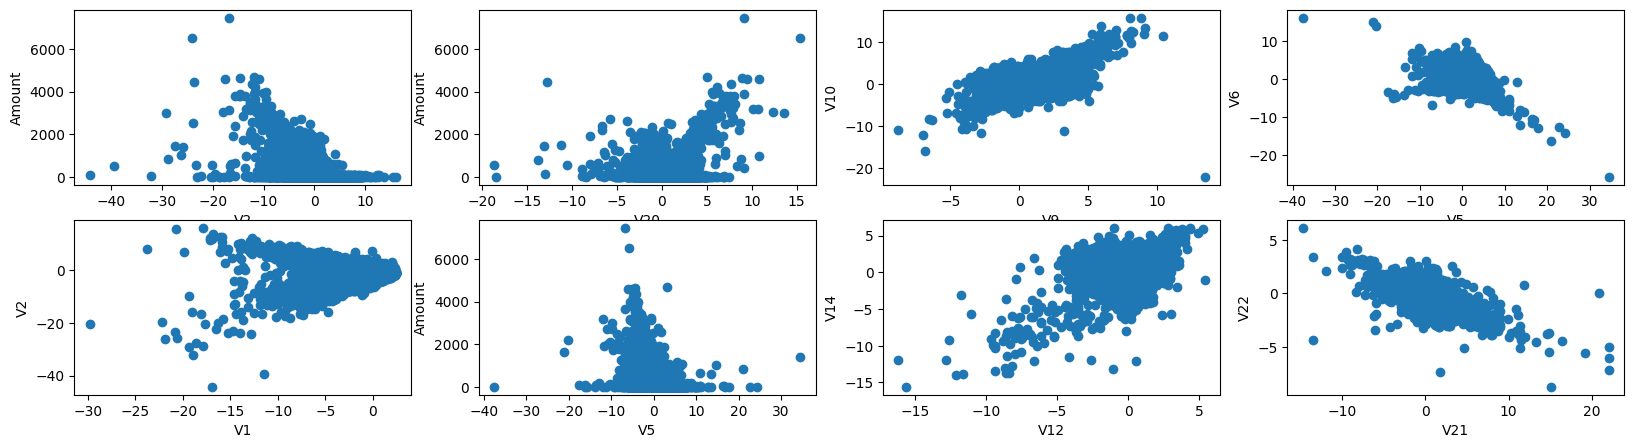

In [10]:
def corr_plot(pred1, pred2):
    plt.scatter(df_train.loc[:, pred1], df_train.loc[:, pred2])
    plt.xlabel(pred1)
    plt.ylabel(pred2)
corr_fig = plt.figure(figsize=(20,5))
gs = GridSpec(nrows = 2, ncols = 4)
ax0 = corr_fig.add_subplot(gs[0, 0])
corr_plot("V2", "Amount")
ax1 = corr_fig.add_subplot(gs[0, 1])
corr_plot("V20", "Amount")
ax2 = corr_fig.add_subplot(gs[0, 2])
corr_plot("V9", "V10")
ax3 = corr_fig.add_subplot(gs[0, 3])
corr_plot("V5", "V6")
ax4 = corr_fig.add_subplot(gs[1, 0])
corr_plot("V1", "V2")
ax5 = corr_fig.add_subplot(gs[1, 1])
corr_plot("V5", "Amount")
ax6 = corr_fig.add_subplot(gs[1, 2])
corr_plot("V12", "V14")
ax7 = corr_fig.add_subplot(gs[1, 3])
corr_plot("V21", "V22")

# 2. Imputation

In [13]:
# Load necessary libraries
!pip install impyute
import pandas as pd # data manip
from sklearn.impute import SimpleImputer  
import numpy as np # data manip
import seaborn as sns # data viz
import matplotlib.pyplot as plt # data viz
from sklearn.impute import KNNImputer # kNN imputation
from sklearn.preprocessing import MinMaxScaler # MinMax scaler
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LogisticRegression # Logistic regression model

# load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# Set seed for reproducibility
np.random.seed(123)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Imputation is the process of estimating and filling in missing data in a dataset. Missing data can occur for various reasons, such as data entry errors, non-response in surveys, or technical issues during data collection.

### 2.1 Data manipulation

To begin with we'll slim the dataset to just \~20k rows, to make the workflow less computationally intensive, and once we have a working method we can run the full dataset.


In [14]:
# Create slim dataset with 10% of the rows
slim = data.sample(frac = 0.1, random_state = 123)

### Introducing missing values

The data are complete, but in order to test imputation on the credit card fraud data we need to introduce NA values at random (MCAR). We won't remove data from the columns 'id' or 'Class'. We'll begin with 10% data changed at random to NA, but we can alter this and compare performance metrics across different missing data percentages further down the line.

In [15]:
# Introduce missing values
np.random.seed(123)
na_rate = 0.1  # 10% missing values
cols_to_mutate = [col for col in slim.columns if col not in ['id', 'Class', 'Time']]
slim_with_na = slim[cols_to_mutate].apply(lambda x: np.where(np.random.uniform(size=len(x)) < na_rate, np.nan, x))
slim_with_na = pd.concat([slim[['id', 'Class', 'Time']], slim_with_na], axis=1)

We can visualise the missing data to get an idea of how it's distributed:

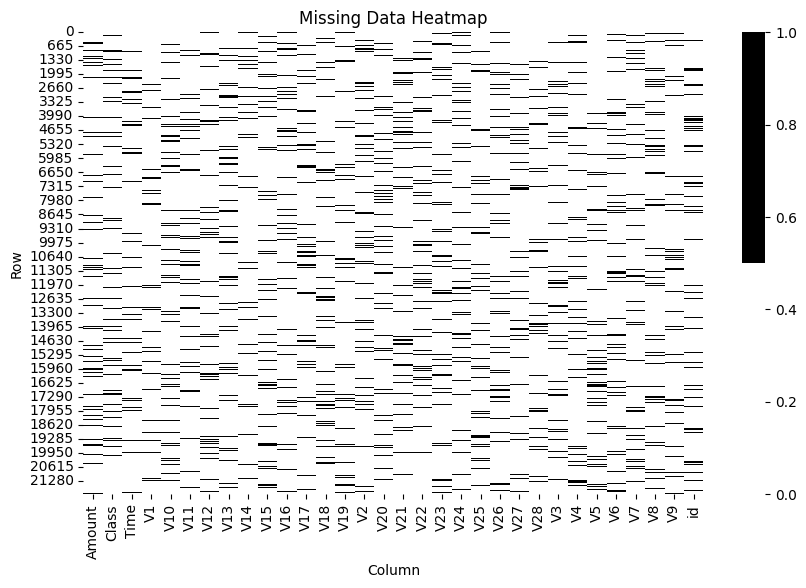

In [16]:
# Visualiise the missing data
missing_matrix = slim_with_na.isna()

missing_data = pd.DataFrame({
    "Column": np.repeat(missing_matrix.columns, len(missing_matrix)),
    "Row": np.tile(np.arange(len(missing_matrix)), len(missing_matrix.columns)),
    "Missing": missing_matrix.values.ravel()
})

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data.pivot("Row", "Column", "Missing"), cmap=["white", "black"])
plt.title("Missing Data Heatmap")
plt.show()

In the resulting plot, each cell represents a data point in the dataset. Missing values are shown in one color (e.g., gray), while non-missing values are shown in another color (e.g., black). This visualization helps to identify patterns in missing data and can provide insights into the missing data mechanism (MCAR, MAR, or MNAR). We can see that there are no obvious large missing chunks or systemic patterns - it looks like the data are missing completely at random.

### 2.3 Running different imputation methods

Perform Mean, MICE and kNN imputations:

In [17]:
# Mean imputation
import impyute
mean_imputed = slim_with_na.copy()
for i in range(2, len(mean_imputed.columns)):
    mean_imputed.iloc[:, i].fillna(mean_imputed.iloc[:, i].mean(), inplace=True)

# MICE imputation
from impyute.imputation.cs import mice
mice_init = mice(slim_with_na.iloc[:, 2:31].values)
mice_imputed = pd.DataFrame(mice_init, columns=slim_with_na.iloc[:, 2:31].columns)

# kNN imputation
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
knn_imputed = pd.DataFrame(knn_imputer.fit_transform(slim_with_na.iloc[:, 2:31]), columns=slim_with_na.iloc[:, 2:31].columns)

### 2.4 Performance Evaluation

NRMSE metric comparison:

In [19]:
# Define a function to calculate NRMSE
def calculate_nrmse(original, imputed):
    rmse = np.sqrt(np.nanmean((original - imputed)**2))
    range_original = np.nanmax(original) - np.nanmin(original)
    nrmse = rmse / range_original
    return nrmse

# Calculate NRMSE for each imputation method
nrmse_mean = calculate_nrmse(slim[['id', 'Class']], mean_imputed[['id', 'Class']])
nrmse_mice = calculate_nrmse(slim.iloc[:, 2:31], mice_imputed)
nrmse_knn = calculate_nrmse(slim.iloc[:, 2:31], knn_imputed)

# Print NRMSE values
print("NRMSE for Mean Imputation:", nrmse_mean)
print("NRMSE for MICE Imputation:", nrmse_mice)
print("NRMSE for kNN Imputation:", nrmse_knn)

NRMSE for Mean Imputation: 0.0
NRMSE for MICE Imputation: 0.0003696986844926619
NRMSE for kNN Imputation: 0.000369019975135236


Visual comparison:

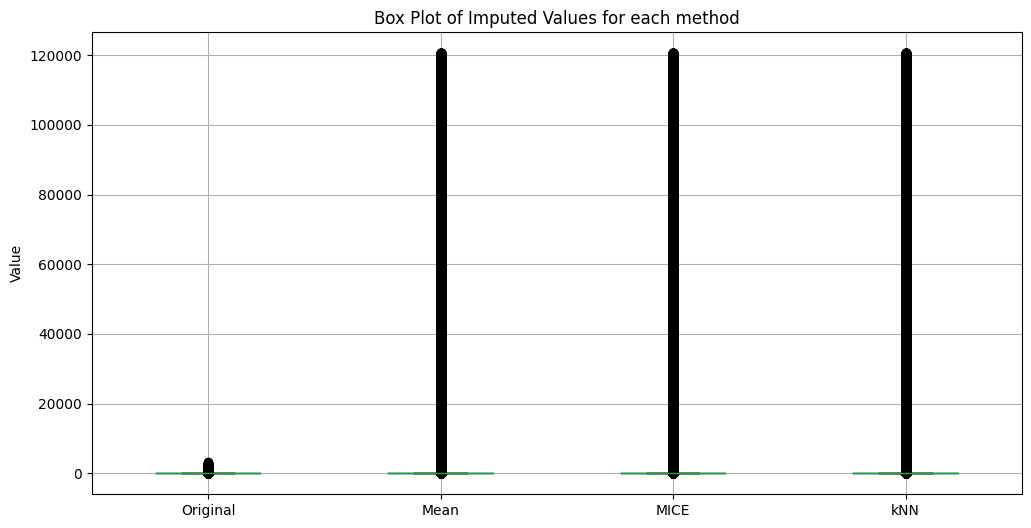

In [28]:
# Visualize the performance of each imputation method using scatter plots
import matplotlib.pyplot as plt

# Create a new dataframe with original and imputed values
comparison_data_box = pd.DataFrame({
    "Original": np.ravel(slim.iloc[:, 2:31]),
    "Mean": np.ravel(mean_imputed.iloc[:, 2:31]),
    "MICE": np.ravel(mice_imputed),
    "kNN": np.ravel(knn_imputed)
})

# Create a box plot of the imputed values for each method
plt.figure(figsize=(12, 6))
comparison_data_box.boxplot(column=["Original", "Mean", "MICE", "kNN"])
plt.title("Box Plot of Imputed Values for each method")
plt.ylabel("Value")
plt.show()


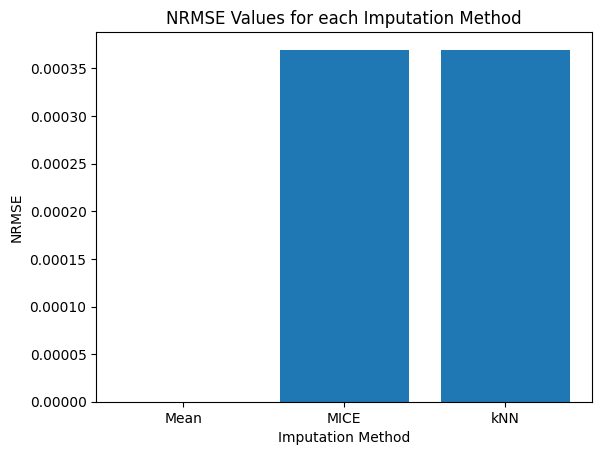

In [30]:
import matplotlib.pyplot as plt

# Calculate NRMSE values for each method
nrmse_mean = calculate_nrmse(slim.iloc[:, [0, 31]], mean_imputed.iloc[:, [0, 29]])
nrmse_mice = calculate_nrmse(slim.iloc[:, 2:31], mice_imputed)
nrmse_knn = calculate_nrmse(slim.iloc[:, 2:31], knn_imputed)

# Create a bar plot of the NRMSE values for each method
nrmse_values = [nrmse_mean, nrmse_mice, nrmse_knn]
methods = ["Mean", "MICE", "kNN"]
plt.bar(methods, nrmse_values)
plt.title("NRMSE Values for each Imputation Method")
plt.xlabel("Imputation Method")
plt.ylabel("NRMSE")
plt.show()


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with original and imputed values
comparison_data = pd.DataFrame({
    "Original": np.ravel(slim.iloc[:, 2:31]),
    "Mean": np.ravel(mean_imputed.iloc[:, 2:31]),
    "MICE": np.ravel(mice_imputed),
    "kNN": np.ravel(knn_imputed)
})

# Melt the dataframe to long format
comparison_data_melted = pd.melt(comparison_data, var_name="Method", value_name="Value")

# Set up the color palette
color_palette = sns.color_palette("Set2", 4)

# Create the plot using a swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Method", y="Value", data=comparison_data_melted, palette=color_palette)

# Add lines showing the mean value for each method
mean_values = comparison_data.mean()
plt.axhline(mean_values["Original"], color=color_palette[0], linestyle="--", label="Original Mean")
plt.axhline(mean_values["Mean"], color=color_palette[1], linestyle="--", label="Mean Imputed Mean")
plt.axhline(mean_values["MICE"], color=color_palette[2], linestyle="--", label="MICE Imputed Mean")
plt.axhline(mean_values["kNN"], color=color_palette[3], linestyle="--", label="kNN Imputed Mean")

# Add a legend and labels
plt.legend()
plt.title("Comparison of Imputed and Original Values")
plt.xlabel("Imputation Method")
plt.ylabel("Value")
plt.show()


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f784c18d940> (for post_execute):


KeyboardInterrupt: ignored

## 3. Forming Models

### 3.1 Modelling LGBM and Logistic Regression


In [18]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'
!pip install lightgbm
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 4.1 MB/s eta 0:00:00


In [29]:
#read file in as cv
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

display(train)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


Firstly, we will look at the LGBM model. 
\
The code was inspired by https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5 and https://www.kaggle.com/code/soupmonster/simple-lgbm-baseline-optuna#Optuna. 
\
We have used Optuna in order to recognise the best combination of hyperparameters.

In [32]:
target = 'Class'
X = train.reset_index(drop = True)
test = test
features = [c for c in train.columns if c not in [ target]]

In [33]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=71)

In [34]:
def objective(trial):
    param_grid = {
        'objective': 'binary',
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=298),
        "max_depth": trial.suggest_int("max_depth", 6, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 90, 105),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=20),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=20),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 0.65),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.65, 0.85)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = np.empty(5)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X[features], X[target])):
        X_train, y_train = X.loc[train_idx, features], X.loc[train_idx, target]
        X_val, y_val = X.loc[val_idx, features], X.loc[val_idx, target]

        model = lgbm.LGBMClassifier(**param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=50,
            verbose = 500)
        
        
        preds = model.predict_proba(X_val)[:,1]
        cv_scores[idx] = roc_auc_score(y_val, preds)

    return np.mean(cv_scores)

In [35]:
from optuna.samplers import TPESampler
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2023-04-06 10:50:30,756] A new study created in memory with name: no-name-82c35f44-c219-41fd-9f7d-96cdc92c84e8
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5994029522064278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5994029522064278
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.7130696956171992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7130696956171992
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0152191


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5994029522064278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5994029522064278
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.7130696956171992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7130696956171992
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.014979


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5994029522064278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5994029522064278
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.7130696956171992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7130696956171992
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0151682


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5994029522064278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5994029522064278
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.7130696956171992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7130696956171992
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5994029522064278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5994029522064278
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.7130696956171992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7130696956171992
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0148772


[I 2023-04-06 10:51:22,604] Trial 0 finished with value: 0.6736946212787552 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09321405207469716, 'num_leaves': 318, 'max_depth': 11, 'min_data_in_leaf': 100, 'lambda_l1': 80, 'lambda_l2': 40, 'bagging_fraction': 0.5994029522064278, 'bagging_freq': 1, 'feature_fraction': 0.7130696956171992}. Best is trial 0 with value: 0.6736946212787552.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warn

[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6066533066119096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066533066119096
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.666782542357272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.666782542357272
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0149066
[1000]	valid_0's binary_logloss: 0.0148233
[1500]	valid_0's binary_logloss: 0.0147647
[2000]	valid_0's binary_logloss: 0.0147283
[2500]	valid_0's binary_logloss: 0.0146955
[3000]	valid_0's binary_logloss: 0.0146692
[3500]	vali

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6066533066119096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066533066119096
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.666782542357272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.666782542357272
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0148107
[1000]	valid_0's binary_logloss: 0.0146798
[1500]	valid_0's binary_logloss: 0.0146229
[2000]	valid_0's binary_logloss: 0.0145802


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6066533066119096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066533066119096
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.666782542357272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.666782542357272
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0148797
[1000]	valid_0's binary_logloss: 0.0147739
[1500]	valid_0's binary_logloss: 0.0147104
[2000]	valid_0's binary_logloss: 0.0146778


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6066533066119096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066533066119096
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.666782542357272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.666782542357272
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0148194
[1000]	valid_0's binary_logloss: 0.0147079
[1500]	valid_0's binary_logloss: 0.0146551
[2000]	valid_0's binary_logloss: 0.0146185
[2500]	valid_0's binary_logloss: 0.0145951
[3000]	valid_0's binary_logloss: 0.0145715
[3500]	vali

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6066533066119096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066533066119096
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.666782542357272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.666782542357272
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0146237
[1000]	valid_0's binary_logloss: 0.014486
[1500]	valid_0's binary_logloss: 0.0144107
[2000]	valid_0's binary_logloss: 0.0143671
[2500]	valid_0's binary_logloss: 0.0143331
[3000]	valid_0's binary_logloss: 0.0143055
[3500]	valid

[I 2023-04-06 10:56:05,449] Trial 1 finished with value: 0.7637231684750754 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0436036244696001, 'num_leaves': 1808, 'max_depth': 11, 'min_data_in_leaf': 96, 'lambda_l1': 60, 'lambda_l2': 80, 'bagging_fraction': 0.6066533066119096, 'bagging_freq': 1, 'feature_fraction': 0.666782542357272}. Best is trial 1 with value: 0.7637231684750754.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warnin

[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5506308017370666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506308017370666
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8224979317547715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8224979317547715
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5506308017370666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506308017370666
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8224979317547715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8224979317547715
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5506308017370666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506308017370666
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8224979317547715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8224979317547715
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.015587


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5506308017370666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506308017370666
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8224979317547715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8224979317547715
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5506308017370666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506308017370666
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8224979317547715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8224979317547715
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 10:56:44,747] Trial 2 finished with value: 0.5880627441936801 and parameters: {'n_estimators': 10000, 'learning_rate': 0.24368879093053875, 'num_leaves': 914, 'max_depth': 10, 'min_data_in_leaf': 104, 'lambda_l1': 100, 'lambda_l2': 80, 'bagging_fraction': 0.5506308017370666, 'bagging_freq': 1, 'feature_fraction': 0.8224979317547715}. Best is trial 1 with value: 0.7637231684750754.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.632350455958527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.632350455958527
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7524319215099464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524319215099464
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.01317
[1000]	valid_0's binary_logloss: 0.0130309


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.632350455958527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.632350455958527
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7524319215099464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524319215099464
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0128899
[1000]	valid_0's binary_logloss: 0.0127388


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.632350455958527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.632350455958527
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7524319215099464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524319215099464
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.01358
[1000]	valid_0's binary_logloss: 0.0134451
[1500]	valid_0's binary_logloss: 0.013387


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.632350455958527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.632350455958527
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7524319215099464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524319215099464
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0131485


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.632350455958527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.632350455958527
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7524319215099464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524319215099464
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0131519


[I 2023-04-06 10:59:16,388] Trial 3 finished with value: 0.8172680020230123 and parameters: {'n_estimators': 10000, 'learning_rate': 0.053412906810707934, 'num_leaves': 1808, 'max_depth': 7, 'min_data_in_leaf': 90, 'lambda_l1': 20, 'lambda_l2': 100, 'bagging_fraction': 0.632350455958527, 'bagging_freq': 1, 'feature_fraction': 0.7524319215099464}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warn

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5746257882745851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746257882745851
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7083418475942714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083418475942714
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5746257882745851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746257882745851
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7083418475942714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083418475942714
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5746257882745851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746257882745851
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7083418475942714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083418475942714
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5746257882745851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746257882745851
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7083418475942714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083418475942714
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5746257882745851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746257882745851
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7083418475942714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083418475942714
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 10:59:42,760] Trial 4 finished with value: 0.8069451422291092 and parameters: {'n_estimators': 10000, 'learning_rate': 0.26472961109367366, 'num_leaves': 2106, 'max_depth': 10, 'min_data_in_leaf': 90, 'lambda_l1': 0, 'lambda_l2': 20, 'bagging_fraction': 0.5746257882745851, 'bagging_freq': 1, 'feature_fraction': 0.7083418475942714}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5044787329524977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5044787329524977
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7946306299364246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946306299364246
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0151306
[1000]	valid_0's binary_logloss: 0.0150918
[1500]	valid_0's binary_logloss: 0.015057
[2000]	valid_0's binary_logloss: 0.0150397


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5044787329524977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5044787329524977
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7946306299364246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946306299364246
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0151205
[1000]	valid_0's binary_logloss: 0.0150477
[1500]	valid_0's binary_logloss: 0.0150069


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5044787329524977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5044787329524977
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7946306299364246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946306299364246
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0151063
[1000]	valid_0's binary_logloss: 0.0150419


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5044787329524977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5044787329524977
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7946306299364246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946306299364246
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0151141
[1000]	valid_0's binary_logloss: 0.0150492


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5044787329524977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5044787329524977
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.7946306299364246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946306299364246
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0149658
[1000]	valid_0's binary_logloss: 0.0149054
[1500]	valid_0's binary_logloss: 0.0148506
[2000]	valid_0's binary_logloss: 0.0148177


[I 2023-04-06 11:02:03,532] Trial 5 finished with value: 0.745903796941848 and parameters: {'n_estimators': 10000, 'learning_rate': 0.026314568765886594, 'num_leaves': 914, 'max_depth': 11, 'min_data_in_leaf': 101, 'lambda_l1': 60, 'lambda_l2': 20, 'bagging_fraction': 0.5044787329524977, 'bagging_freq': 1, 'feature_fraction': 0.7946306299364246}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warn

[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5761892339377774, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5761892339377774
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.8026726060573789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026726060573789
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0152177


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5761892339377774, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5761892339377774
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.8026726060573789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026726060573789
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5761892339377774, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5761892339377774
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.8026726060573789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026726060573789
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0152187


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5761892339377774, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5761892339377774
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.8026726060573789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026726060573789
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5761892339377774, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5761892339377774
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.8026726060573789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026726060573789
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0148514


[I 2023-04-06 11:02:50,457] Trial 6 finished with value: 0.6697013904160285 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12467715477387019, 'num_leaves': 2106, 'max_depth': 11, 'min_data_in_leaf': 104, 'lambda_l1': 80, 'lambda_l2': 20, 'bagging_fraction': 0.5761892339377774, 'bagging_freq': 1, 'feature_fraction': 0.8026726060573789}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5481011158179003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5481011158179003
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7656177880420535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7656177880420535
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0146545


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5481011158179003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5481011158179003
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7656177880420535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7656177880420535
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5481011158179003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5481011158179003
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7656177880420535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7656177880420535
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0146467


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5481011158179003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5481011158179003
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7656177880420535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7656177880420535
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.5481011158179003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5481011158179003
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7656177880420535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7656177880420535
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0143855


[I 2023-04-06 11:03:30,631] Trial 7 finished with value: 0.7632568286865635 and parameters: {'n_estimators': 10000, 'learning_rate': 0.28282809535359044, 'num_leaves': 1212, 'max_depth': 7, 'min_data_in_leaf': 102, 'lambda_l1': 60, 'lambda_l2': 0, 'bagging_fraction': 0.5481011158179003, 'bagging_freq': 1, 'feature_fraction': 0.7656177880420535}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6367756909140292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6367756909140292
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7795380751849176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795380751849176
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6367756909140292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6367756909140292
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7795380751849176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795380751849176
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6367756909140292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6367756909140292
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7795380751849176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795380751849176
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6367756909140292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6367756909140292
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7795380751849176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795380751849176
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6367756909140292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6367756909140292
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.7795380751849176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795380751849176
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 11:03:58,613] Trial 8 finished with value: 0.6175671128296406 and parameters: {'n_estimators': 10000, 'learning_rate': 0.25140465606118456, 'num_leaves': 2106, 'max_depth': 12, 'min_data_in_leaf': 105, 'lambda_l1': 0, 'lambda_l2': 0, 'bagging_fraction': 0.6367756909140292, 'bagging_freq': 1, 'feature_fraction': 0.7795380751849176}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.519612222747029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.519612222747029
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7985438946597949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985438946597949
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0157082


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.519612222747029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.519612222747029
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7985438946597949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985438946597949
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.519612222747029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.519612222747029
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7985438946597949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985438946597949
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0157761


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.519612222747029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.519612222747029
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7985438946597949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985438946597949
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0157002


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.519612222747029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.519612222747029
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7985438946597949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985438946597949
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0155241


[I 2023-04-06 11:04:44,216] Trial 9 finished with value: 0.549446074416409 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11850170318991933, 'num_leaves': 1212, 'max_depth': 10, 'min_data_in_leaf': 102, 'lambda_l1': 100, 'lambda_l2': 100, 'bagging_fraction': 0.519612222747029, 'bagging_freq': 1, 'feature_fraction': 0.7985438946597949}. Best is trial 3 with value: 0.8172680020230123.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0130714


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.012852
[1000]	valid_0's binary_logloss: 0.0127396


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0134814


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.013082


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0131572


[I 2023-04-06 11:06:36,990] Trial 10 finished with value: 0.8172996960773304 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0684537631114084, 'num_leaves': 3000, 'max_depth': 6, 'min_data_in_leaf': 90, 'lambda_l1': 20, 'lambda_l2': 100, 'bagging_fraction': 0.6459366289855475, 'bagging_freq': 1, 'feature_fraction': 0.844719975564313}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warn

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6494067147002276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6494067147002276
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.838918797747383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.838918797747383
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0131044
[1000]	valid_0's binary_logloss: 0.0130011


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6494067147002276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6494067147002276
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.838918797747383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.838918797747383
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0128478


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6494067147002276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6494067147002276
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.838918797747383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.838918797747383
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0135194


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6494067147002276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6494067147002276
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.838918797747383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.838918797747383
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0130904


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6494067147002276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6494067147002276
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.838918797747383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.838918797747383
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 11:08:31,511] Trial 11 finished with value: 0.816339931329828 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06478554247165327, 'num_leaves': 3000, 'max_depth': 6, 'min_data_in_leaf': 90, 'lambda_l1': 20, 'lambda_l2': 100, 'bagging_fraction': 0.6494067147002276, 'bagging_freq': 1, 'feature_fraction': 0.838918797747383}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warn

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6313436162374543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313436162374543
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8350860605347956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8350860605347956
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0136857
[1000]	valid_0's binary_logloss: 0.0132734
[1500]	valid_0's binary_logloss: 0.0131504
[2000]	valid_0's binary_logloss: 0.0131008


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6313436162374543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313436162374543
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8350860605347956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8350860605347956
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0133852
[1000]	valid_0's binary_logloss: 0.0129838
[1500]	valid_0's binary_logloss: 0.0128465
[2000]	valid_0's binary_logloss: 0.0127832
[2500]	valid_0's binary_logloss: 0.0127523
[3000]	valid_0's binary_logloss: 0.0127313


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6313436162374543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313436162374543
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8350860605347956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8350860605347956
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0139063
[1000]	valid_0's binary_logloss: 0.0136448
[1500]	valid_0's binary_logloss: 0.0135267
[2000]	valid_0's binary_logloss: 0.0134673


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6313436162374543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313436162374543
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8350860605347956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8350860605347956
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0136152
[1000]	valid_0's binary_logloss: 0.0132233
[1500]	valid_0's binary_logloss: 0.0131022
[2000]	valid_0's binary_logloss: 0.0130607


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6313436162374543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313436162374543
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8350860605347956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8350860605347956
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.013478
[1000]	valid_0's binary_logloss: 0.013245


[I 2023-04-06 11:13:51,288] Trial 12 finished with value: 0.8162674839656356 and parameters: {'n_estimators': 10000, 'learning_rate': 0.01804970517250576, 'num_leaves': 3000, 'max_depth': 8, 'min_data_in_leaf': 94, 'lambda_l1': 20, 'lambda_l2': 80, 'bagging_fraction': 0.6313436162374543, 'bagging_freq': 1, 'feature_fraction': 0.8350860605347956}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6201059547715825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6201059547715825
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7515187408988567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7515187408988567
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0130532


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6201059547715825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6201059547715825
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7515187408988567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7515187408988567
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0128098


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6201059547715825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6201059547715825
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7515187408988567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7515187408988567
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.013494


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6201059547715825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6201059547715825
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7515187408988567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7515187408988567
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0130297


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6201059547715825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6201059547715825
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7515187408988567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7515187408988567
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 11:15:18,426] Trial 13 finished with value: 0.8157044619833836 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07407320185403757, 'num_leaves': 2702, 'max_depth': 6, 'min_data_in_leaf': 93, 'lambda_l1': 20, 'lambda_l2': 60, 'bagging_fraction': 0.6201059547715825, 'bagging_freq': 1, 'feature_fraction': 0.7515187408988567}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6496853975890706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496853975890706
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.8416118862864306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8416118862864306
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0136779
[1000]	valid_0's binary_logloss: 0.0135957


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6496853975890706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496853975890706
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.8416118862864306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8416118862864306
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0133691
[1000]	valid_0's binary_logloss: 0.0132555


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6496853975890706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496853975890706
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.8416118862864306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8416118862864306
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0138663
[1000]	valid_0's binary_logloss: 0.0138087


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6496853975890706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496853975890706
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.8416118862864306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8416118862864306
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0135827
[1000]	valid_0's binary_logloss: 0.0134872


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6496853975890706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496853975890706
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.8416118862864306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8416118862864306
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0133593
[1000]	valid_0's binary_logloss: 0.0133027
[1500]	valid_0's binary_logloss: 0.013271
[2000]	valid_0's binary_logloss: 0.0132551


[I 2023-04-06 11:17:34,554] Trial 14 finished with value: 0.8040773215439655 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1630230701753178, 'num_leaves': 2404, 'max_depth': 8, 'min_data_in_leaf': 92, 'lambda_l1': 40, 'lambda_l2': 100, 'bagging_fraction': 0.6496853975890706, 'bagging_freq': 1, 'feature_fraction': 0.8416118862864306}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6200380254410972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200380254410972
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7323621705183107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323621705183107
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0143513
[1000]	valid_0's binary_logloss: 0.014074
[1500]	valid_0's binary_logloss: 0.0139665
[2000]	valid_0's binary_logloss: 0.0139115
[2500]	valid_0's binary_logloss: 0.013871
[3000]	valid_0's binary_logloss: 0.0138381
[3500]	vali

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6200380254410972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200380254410972
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7323621705183107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323621705183107
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0141682
[1000]	valid_0's binary_logloss: 0.0138058
[1500]	valid_0's binary_logloss: 0.0136621
[2000]	valid_0's binary_logloss: 0.0135878
[2500]	valid_0's binary_logloss: 0.0135339
[3000]	valid_0's binary_logloss: 0.0135009
[3500]	va

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6200380254410972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200380254410972
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7323621705183107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323621705183107
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0144467
[1000]	valid_0's binary_logloss: 0.0141923
[1500]	valid_0's binary_logloss: 0.0141004
[2000]	valid_0's binary_logloss: 0.0140493
[2500]	valid_0's binary_logloss: 0.0140199
[3000]	valid_0's binary_logloss: 0.0140031
[3500]	va

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6200380254410972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200380254410972
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7323621705183107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323621705183107
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0142855
[1000]	valid_0's binary_logloss: 0.0139846
[1500]	valid_0's binary_logloss: 0.0138628
[2000]	valid_0's binary_logloss: 0.0137972
[2500]	valid_0's binary_logloss: 0.0137651
[3000]	valid_0's binary_logloss: 0.0137356
[3500]	va

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6200380254410972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200380254410972
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.7323621705183107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323621705183107
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0140632
[1000]	valid_0's binary_logloss: 0.0137333
[1500]	valid_0's binary_logloss: 0.0136004
[2000]	valid_0's binary_logloss: 0.0135409
[2500]	valid_0's binary_logloss: 0.0135039
[3000]	valid_0's binary_logloss: 0.0134773
[3500]	va

[I 2023-04-06 11:30:42,753] Trial 15 finished with value: 0.8013759762541935 and parameters: {'n_estimators': 10000, 'learning_rate': 0.011525097004514671, 'num_leaves': 20, 'max_depth': 7, 'min_data_in_leaf': 97, 'lambda_l1': 40, 'lambda_l2': 60, 'bagging_fraction': 0.6200380254410972, 'bagging_freq': 1, 'feature_fraction': 0.7323621705183107}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warn

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.634062567828122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634062567828122
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8102530871978502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8102530871978502
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0131117


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.634062567828122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634062567828122
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8102530871978502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8102530871978502
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.012855
[1000]	valid_0's binary_logloss: 0.0127405
[1500]	valid_0's binary_logloss: 0.0127002


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.634062567828122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634062567828122
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8102530871978502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8102530871978502
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.01352


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.634062567828122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634062567828122
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8102530871978502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8102530871978502
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.013092


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.634062567828122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634062567828122
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8102530871978502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8102530871978502
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0131567


[I 2023-04-06 11:32:48,761] Trial 16 finished with value: 0.8169790391311084 and parameters: {'n_estimators': 10000, 'learning_rate': 0.057828252795561086, 'num_leaves': 1510, 'max_depth': 7, 'min_data_in_leaf': 95, 'lambda_l1': 20, 'lambda_l2': 80, 'bagging_fraction': 0.634062567828122, 'bagging_freq': 1, 'feature_fraction': 0.8102530871978502}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6083384379689233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6083384379689233
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7736689546480355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736689546480355
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6083384379689233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6083384379689233
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7736689546480355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736689546480355
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6083384379689233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6083384379689233
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7736689546480355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736689546480355
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6083384379689233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6083384379689233
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7736689546480355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736689546480355
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6083384379689233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6083384379689233
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.7736689546480355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736689546480355
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 11:33:49,402] Trial 17 finished with value: 0.8171679442534521 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09294284883106887, 'num_leaves': 2702, 'max_depth': 8, 'min_data_in_leaf': 92, 'lambda_l1': 0, 'lambda_l2': 100, 'bagging_fraction': 0.6083384379689233, 'bagging_freq': 1, 'feature_fraction': 0.7736689546480355}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.649781330124406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.649781330124406
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.8496034385423221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8496034385423221
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0138524
[1000]	valid_0's binary_logloss: 0.0137452
[1500]	valid_0's binary_logloss: 0.013691
[2000]	valid_0's binary_logloss: 0.0136417


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.649781330124406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.649781330124406
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.8496034385423221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8496034385423221
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0135239
[1000]	valid_0's binary_logloss: 0.0133848
[1500]	valid_0's binary_logloss: 0.0133393
[2000]	valid_0's binary_logloss: 0.013309
[2500]	valid_0's binary_logloss: 0.0132699
[3000]	valid_0's binary_logloss: 0.0132547
[3500]	valid

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.649781330124406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.649781330124406
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.8496034385423221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8496034385423221
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0139956
[1000]	valid_0's binary_logloss: 0.0139163
[1500]	valid_0's binary_logloss: 0.0138812
[2000]	valid_0's binary_logloss: 0.0138604
[2500]	valid_0's binary_logloss: 0.013844
[3000]	valid_0's binary_logloss: 0.013828
[3500]	valid_

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.649781330124406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.649781330124406
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.8496034385423221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8496034385423221
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.013756
[1000]	valid_0's binary_logloss: 0.0136513
[1500]	valid_0's binary_logloss: 0.013612
[2000]	valid_0's binary_logloss: 0.013582
[2500]	valid_0's binary_logloss: 0.0135677
[3000]	valid_0's binary_logloss: 0.0135461
[3500]	valid_0

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.649781330124406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.649781330124406
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.8496034385423221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8496034385423221
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0134799
[1000]	valid_0's binary_logloss: 0.0133872
[1500]	valid_0's binary_logloss: 0.0133484
[2000]	valid_0's binary_logloss: 0.0133243
[2500]	valid_0's binary_logloss: 0.013307


[I 2023-04-06 11:39:05,821] Trial 18 finished with value: 0.803850968063354 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04449694438037434, 'num_leaves': 616, 'max_depth': 6, 'min_data_in_leaf': 99, 'lambda_l1': 40, 'lambda_l2': 60, 'bagging_fraction': 0.649781330124406, 'bagging_freq': 1, 'feature_fraction': 0.8496034385423221}. Best is trial 10 with value: 0.8172996960773304.
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warnin

[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6236112027274462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6236112027274462
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.784040256868448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784040256868448
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6236112027274462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6236112027274462
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.784040256868448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784040256868448
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6236112027274462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6236112027274462
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.784040256868448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784040256868448
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6236112027274462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6236112027274462
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.784040256868448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784040256868448
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6236112027274462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6236112027274462
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.784040256868448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784040256868448
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-06 11:39:49,166] Trial 19 finished with value: 0.8161837008920811 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16742130717876852, 'num_leaves': 1808, 'max_depth': 9, 'min_data_in_leaf': 91, 'lambda_l1': 20, 'lambda_l2': 40, 'bagging_fraction': 0.6236112027274462, 'bagging_freq': 1, 'feature_fraction': 0.784040256868448}. Best is trial 10 with value: 0.8172996960773304.


{'n_estimators': 10000,
 'learning_rate': 0.0684537631114084,
 'num_leaves': 3000,
 'max_depth': 6,
 'min_data_in_leaf': 90,
 'lambda_l1': 20,
 'lambda_l2': 100,
 'bagging_fraction': 0.6459366289855475,
 'bagging_freq': 1,
 'feature_fraction': 0.844719975564313}

In [36]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 0.81730
	Best params:
		n_estimators: 10000
		learning_rate: 0.0684537631114084
		num_leaves: 3000
		max_depth: 6
		min_data_in_leaf: 90
		lambda_l1: 20
		lambda_l2: 100
		bagging_fraction: 0.6459366289855475
		bagging_freq: 1
		feature_fraction: 0.844719975564313


We have opted to analyse our model with the ROC AUC metric. This is because, in heavily imbalanced datasets, accuracy can easily be a high value by just stating 'non-fraud' for all data.
\
We use our best hyperparameters in our final model below.

In [37]:

n=10
cv = StratifiedKFold(n,shuffle=True, random_state=42)
test_preds = []

all_scores = []
for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train[target])):
    X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, target]
    X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, target] 
    params = study.best_params  
    # params={'objective': 'binary',
    #          'metric': 'auc',
    #          'lambda_l1': 20, 
    #          'lambda_l2': 100,
    #          'num_leaves': 3000,
    #          'feature_fraction': 0.844719975564313,
    #          'bagging_fraction': 0.6459366289855475,
    #          'bagging_freq': 1,
    #          'min_data_in_leaf': 90,
    #          'max_depth': 6,
    #          'num_iterations': 10000,
    #          'learning_rate':0.0684537631114084}
    
    model = lgbm.LGBMClassifier(**params)
    model.fit(X_train,
              y_train,
              eval_set = [(X_val,y_val)],
              early_stopping_rounds=50,
              verbose=500)
    
    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val,y_pred)
    all_scores.append(score)
    
    test_pred = model.predict_proba(test[features])[:,1]
    test_preds.append(test_pred)
    print(f'=== Fold {i} ROC AUC Score {score} ===')
print(f'=== Average ROC AUC Score {np.mean(all_scores)} ===')

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[500]	valid_0's binary_logloss: 0.0129458
=== Fold 0 ROC AUC Score 0.8280805136119225 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.012986
=== Fold 1 ROC AUC Score 0.8345609914157994 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0132957
=== Fold 2 ROC AUC Score 0.8188521575320472 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.01225
=== Fold 3 ROC AUC Score 0.8676591074066218 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0131203
=== Fold 4 ROC AUC Score 0.8052703993959338 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0136925
=== Fold 5 ROC AUC Score 0.7944326273569575 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0129891
=== Fold 6 ROC AUC Score 0.820575419722838 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0130296
=== Fold 7 ROC AUC Score 0.8182741689711608 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0131186
=== Fold 8 ROC AUC Score 0.8135986891141594 ===
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.6459366289855475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459366289855475
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.844719975564313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.844719975564313
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's binary_logloss: 0.0130318
=== Fold 9 ROC AUC Score 0.79878827164667 ===
=== Average ROC AUC Score 0.8200092346174112 ===


The LGBM model gave an average ROC AUC Score 0.8052436998950719. 0.82 in a previous run through.
\
LGBM_preds gives the average value for each transaction from across all 10 folds.

In [ ]:
LGBM_preds = np.array(test_preds).mean(axis =0)
LGBM_preds

array([0.00184607, 0.00174901, 0.00153905, ..., 0.00173669, 0.00152854,
       0.0017735 ])

Submission code to Kaggle:
\
submission1 = pd.read_csv('C:content/sample_submission.csv')
\
sub_preds = np.vstack(LGBM_preds)
\
submission1['Class'] = sub_preds
\
submission1.to_csv("submission.csv", index=False)

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: fit_intercept


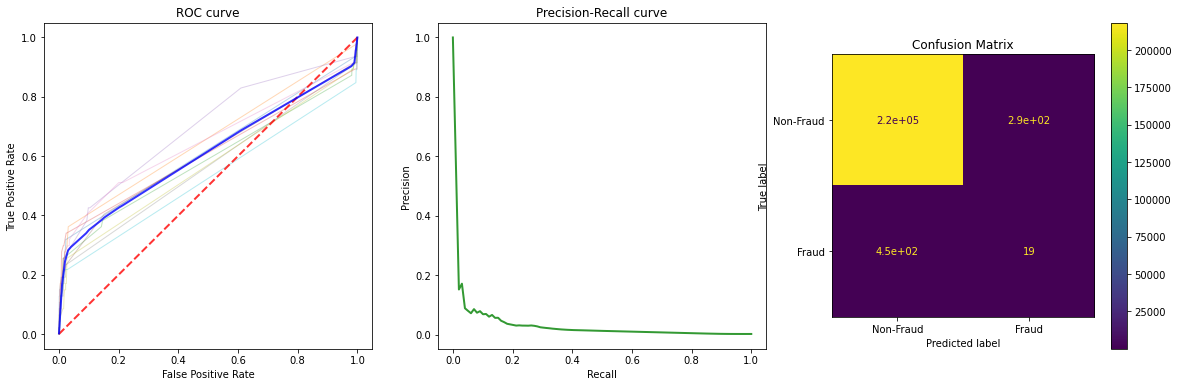

In [ ]:

# Initialize lists to store scores and curves for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
tprs = []
precisions = []
recalls = []
mean_fpr = np.linspace(0, 1, 100)
sum_conf_mat = np.zeros((2, 2))
recall_grid = np.linspace(0, 1, 100)
mean_precision = np.zeros_like(recall_grid)

# LGBM model's parameters
params = study.best_params
# params={'objective': 'binary',
#           'metric': 'auc',
#           'lambda_l1': 0, 
#           'lambda_l2': 80,
#           'num_leaves': 318,
#           'feature_fraction': 0.7436227064576392,
#           'bagging_fraction': 0.5217811575714206,
#           'bagging_freq': 1,
#           'min_data_in_leaf': 101,
#           'max_depth': 10,
#           'num_iterations': 10000,
#           'learning_rate':0.012748151486204224}

model = lgbm.LGBMClassifier(**params)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# ROC curve and Precision-Recall curve
for i, (train_idx, val_idx) in enumerate(cv.split(train[features], train[target])):
    X_train, y_train = train.loc[train_idx, features], train.loc[train_idx, target]
    X_val, y_val = train.loc[val_idx, features], train.loc[val_idx, target]

    model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_val, y_val)], verbose=500)
    
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics for each fold
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    roc_auc_scores.append(roc_auc_score(y_val, y_pred_proba))

    # Compute ROC curve and area under the curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    ax1.plot(fpr, tpr, lw=1, alpha=0.3)


    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    precisions.append(precision)
    recalls.append(recall)
    # Interpolate precision values for the current fold
    f_interp = interp1d(recall, precision, bounds_error=False, fill_value=0)
    mean_precision += f_interp(recall_grid)
    # Compute confusion matrix
    conf_mat = confusion_matrix(y_val, y_pred)
    sum_conf_mat += conf_mat
  
# Average the interpolated precision values
mean_precision /= len(precisions)

# Plot ROC curve
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
ax1.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=0.8)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC curve')


# Plot Precision-Recall curve
ax2.plot(recall_grid, mean_precision, color='g', lw=2, alpha=0.8)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall curve')

# Plot confusion matrix
ConfusionMatrixDisplay(sum_conf_mat, display_labels=['Non-Fraud', 'Fraud']).plot(ax=ax3)
ax3.set_title('Confusion Matrix')

plt.show()





In [ ]:
# Calculate average scores
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)
average_roc_auc = np.mean(roc_auc_scores)

# Print average scores
print(f"Average accuracy: {average_accuracy:.5f}")
print(f"Average precision: {average_precision:.5f}")
print(f"Average recall: {average_recall:.5f}")
print(f"Average F1-score: {average_f1:.5f}")
print(f"Average ROC AUC score: {average_roc_auc:.5f}")



Average accuracy: 0.99664
Average precision: 0.06287
Average recall: 0.04043
Average F1-score: 0.04900
Average ROC AUC score: 0.60744


The Logistic Regression code was inspired by https://www.kaggle.com/code/soupmonster/simple-lgbm-baseline-optuna#Optuna. 
\
We follow a very similar framework as used in the LGBM model.

In [ ]:
# https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27
# https://www.kaggle.com/code/yus002/logistic-regression-optuna-tuning

def objective(trial):
    param_grid = {
        'tol' : trial.suggest_uniform('tol' , 1e-6 , 1e-3),
        'C' : trial.suggest_loguniform("C", 1e-2, 1),
        'fit_intercept' : trial.suggest_categorical('fit_intercept' , [True, False]),
         'random_state' : trial.suggest_categorical('random_state' , [0, 42, 2021, 555]),
        'solver' : trial.suggest_categorical('solver' , ['lbfgs','liblinear']),
        "n_jobs" : -1
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = np.empty(5)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X[features], X[target])):
        X_train, y_train = X.loc[train_idx, features], X.loc[train_idx, target]
        X_val, y_val = X.loc[val_idx, features], X.loc[val_idx, target]

        model = LogisticRegression(**param_grid)
        model.fit(
            X_train,
            y_train)
        
    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val,y_pred)
    all_scores.append(score)
    
    test_pred = model.predict_proba(test[features])[:,1]
    test_preds.append(test_pred)

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2023-03-28 17:52:28,731] A new study created in memory with name: no-name-5a1387b6-c666-4ea4-855b-0da66c1d9926
<ipython-input-19-9977d60e525c>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'tol' : trial.suggest_uniform('tol' , 1e-6 , 1e-3),
<ipython-input-19-9977d60e525c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'C' : trial.suggest_loguniform("C", 1e-2, 1),
[I 2023-03-28 17:53:03,642] Trial 0 finished with value: 4.1 and parameters: {'tol': 0.0006802772458400531, 'C': 0.5982349364987448, 'fit_intercept': False, 'random_state': 42, 'solver': 'lbfgs'}. Best is trial 0 with value: 4.1.
<ipython-input-19-9977d60e525c>:6: FutureWarning: s

{'tol': 0.0006802772458400531,
 'C': 0.5982349364987448,
 'fit_intercept': False,
 'random_state': 42,
 'solver': 'lbfgs'}

In [ ]:
n=10
cv = StratifiedKFold(n,shuffle=True, random_state=42)
test_preds = []

all_scores = []
for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train[target])):
    X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, target]
    X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, target]   
    params={'tol': 0.0005043467619224905,
            'C': 0.03956628721486797,
            'fit_intercept': False,
            'random_state': 44,
            'solver': 'liblinear'}
    
    model = LogisticRegression(**params)
    model.fit(X_train,
              y_train)
    
    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val,y_pred)
    all_scores.append(score)
    
    test_pred = model.predict_proba(test[features])[:,1]
    test_preds.append(test_pred)
    print(f'=== Fold {i} ROC AUC Score {score} ===')
print(f'=== Average ROC AUC Score {np.mean(all_scores)} ===')

=== Fold 0 ROC AUC Score 0.5472627279113984 ===
=== Fold 1 ROC AUC Score 0.510961348717819 ===
=== Fold 2 ROC AUC Score 0.5324276881819827 ===
=== Fold 3 ROC AUC Score 0.5559111493409569 ===
=== Fold 4 ROC AUC Score 0.557071991686306 ===
=== Fold 5 ROC AUC Score 0.52369947708577 ===
=== Fold 6 ROC AUC Score 0.5703958929728656 ===
=== Fold 7 ROC AUC Score 0.5963411572615407 ===
=== Fold 8 ROC AUC Score 0.5708775501069375 ===
=== Fold 9 ROC AUC Score 0.561432480046449 ===
=== Average ROC AUC Score 0.5526381463312025 ===


Logistic Regression has an average ROC AUC Score 0.5526381463312025. This is lower than our LGBM model.

In [ ]:
logreg_preds = np.array(test_preds).mean(axis =0)
logreg_preds

array([8.68985511e-06, 6.44350929e-07, 1.08148853e-05, ...,
       4.93152012e-06, 2.45819544e-08, 2.66223826e-06])

[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] 

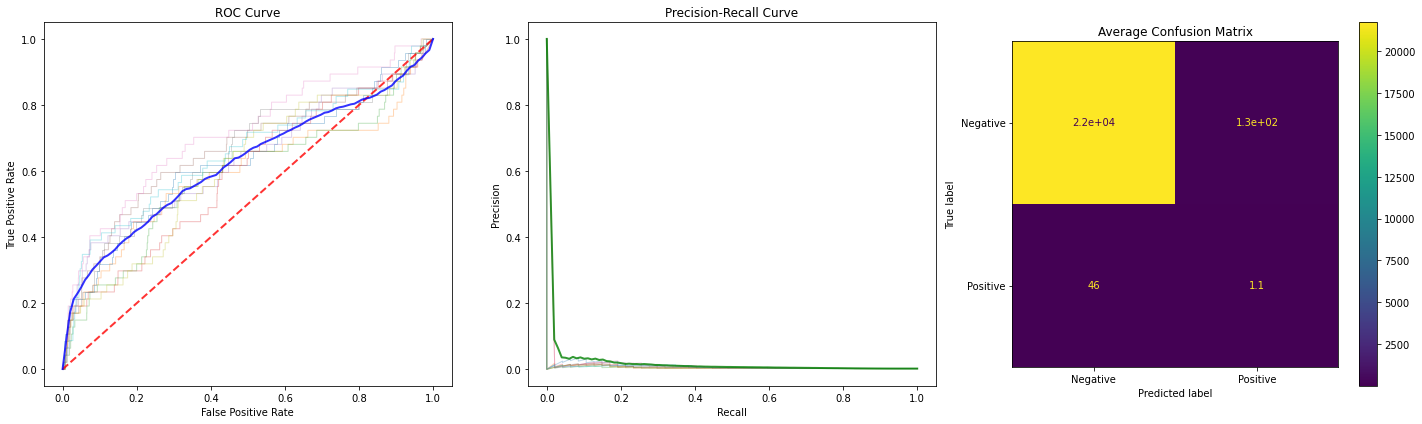

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.interpolate import interp1d
confusion_matrices = []

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# ROC curve and Precision-Recall curve
for i, (train_idx, val_idx) in enumerate(cv.split(train[features], train[target])):
    X_train, y_train = train.loc[train_idx, features], train.loc[train_idx, target]
    X_val, y_val = train.loc[val_idx, features], train.loc[val_idx, target]

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics for each fold
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    roc_auc_scores.append(roc_auc_score(y_val, y_pred_proba))

    # Compute ROC curve and area under the curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    ax1.plot(fpr, tpr, lw=1, alpha=0.3)

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    precisions.append(precision)
    recalls.append(recall)
    ax2.plot(recall, precision, lw=1, alpha=0.3)

    cm = confusion_matrix(y_val, y_pred)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)


# ROC curve
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
ax1.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=0.8)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')

# Precision-Recall curve
interp_recall = np.linspace(0, 1, 100)
interp_precisions = []

for recall, precision in zip(recalls, precisions):
    f = interp1d(recall, precision, kind='linear', fill_value=(0, 1), bounds_error=False)
    interp_precisions.append(f(interp_recall))

mean_precision = np.mean(interp_precisions, axis=0)
ax2.plot(interp_recall, mean_precision, color='g', lw=2, alpha=0.8)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')

# Confusion Matrix
# cm = confusion_matrix(y_val, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
# disp.plot(ax=ax3)
# ax3.set_title('Confusion Matrix')

mean_disp = ConfusionMatrixDisplay(confusion_matrix=mean_cm, display_labels=['Negative', 'Positive'])
mean_disp.plot(ax=ax3)
ax3.set_title('Average Confusion Matrix')


plt.tight_layout()
plt.show()


In [ ]:
# Print average scores
print('Average Accuracy:', np.mean(accuracy_scores))
print('Average Precision:', np.mean(precision_scores))
print('Average Recall:', np.mean(recall_scores))
print('Average F1 Score:', np.mean(f1_scores))
print('Average ROC AUC Score:', np.mean(roc_auc_scores))

Average Accuracy: 0.9936445382847338
Average Precision: 0.026762254101897247
Average Recall: 0.029108849830403946
Average F1 Score: 0.02479324500914178
Average ROC AUC Score: 0.6229143858287008


### 4. Modelling Decision Tree and Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)
display(train)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


In [ ]:
# Generate our feature set and target set, and get rid of id from feature set
X = train.loc[:, 'Time':'Amount']
y = train.loc[:, 'Class']

In [ ]:
print('Shape of X training set {}'.format(X.shape), '&','Size of y training set {}'.format(y.shape))

Shape of X training set (219129, 30) & Size of y training set (219129,)


In [ ]:
# In order to test accuracy score, split the train set further. 
# If it is good enough we apply it to our assigned test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3, min_samples_leaf = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9975357093962488


The accuracy score is too high, and it might be because the classes are imbalanced. When a classifier that always predicts the majority class, it can achieve high accuracy even if it fails to correctly predict any examples from the minority class. In this case, other metrics such as precision, recall, F1-score or ROC AUC score may be more appropriate.

In [ ]:
# Compute ROC AOC score
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.5269740492921959


The ROC AUC score ranges from 0.0 to 1.0, with a score of 1.0 indicating perfect classification performance and a score of 0.5 indicating random guessing. In this case, oue ROC AUC score indicates our classification performance is not efficient.

In [ ]:
# Predict Assigned Testing Set
X_AssignedTest = test.loc[:, 'Time':'Amount']

In [ ]:
# y_predAssigned is our result for the real test set.
y_predAssigned = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.17333333333333334
Recall: 0.033942558746736295
F1 Score: 0.056768558951965066


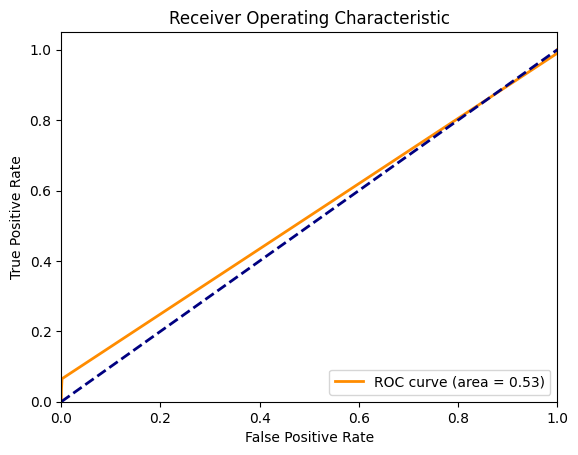

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


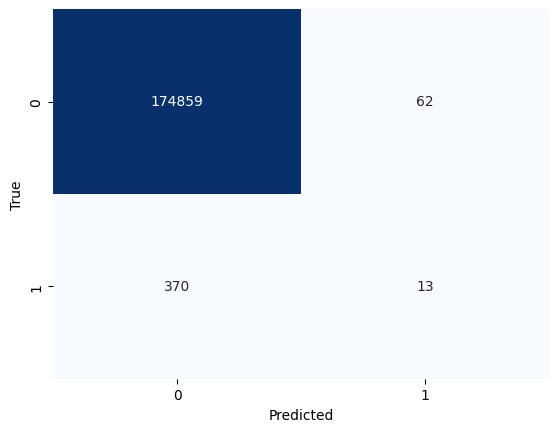

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Modelling Random Forest




In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# Deifine the random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
# Fit the random forest to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the random forest on the test data
score = rf.score(X_test, y_test)
print("Test score:", score)

Test score: 0.9978152238397299


In [ ]:
# Compute ROC AOC score
from sklearn.metrics import roc_auc_score
y_pred_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.6879169384976968


The ROC AUC score is exactly same with the once obtained through decision tree.
It might suggest that decision tree and random forest are essentially similar mechanisms for classification. 

### 5. Feature Importance

In [ ]:
# Obtain feature importances
importances = rf.feature_importances_

In [ ]:
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking")
for f in range(X_train.shape[1]):
    print("%d.feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking
1.feature 17 (0.053526)
2.feature 14 (0.045437)
3.feature 16 (0.040509)
4.feature 26 (0.040349)
5.feature 9 (0.039922)
6.feature 10 (0.039351)
7.feature 8 (0.038587)
8.feature 6 (0.038475)
9.feature 12 (0.035266)
10.feature 19 (0.034523)
11.feature 21 (0.033882)
12.feature 22 (0.033074)
13.feature 1 (0.033058)
14.feature 15 (0.032987)
15.feature 25 (0.032730)
16.feature 13 (0.032501)
17.feature 0 (0.032478)
18.feature 2 (0.031333)
19.feature 4 (0.031330)
20.feature 24 (0.031127)
21.feature 3 (0.030804)
22.feature 18 (0.030032)
23.feature 5 (0.030029)
24.feature 11 (0.028907)
25.feature 28 (0.028712)
26.feature 7 (0.027684)
27.feature 29 (0.025738)
28.feature 20 (0.025437)
29.feature 23 (0.021759)
30.feature 27 (0.020455)


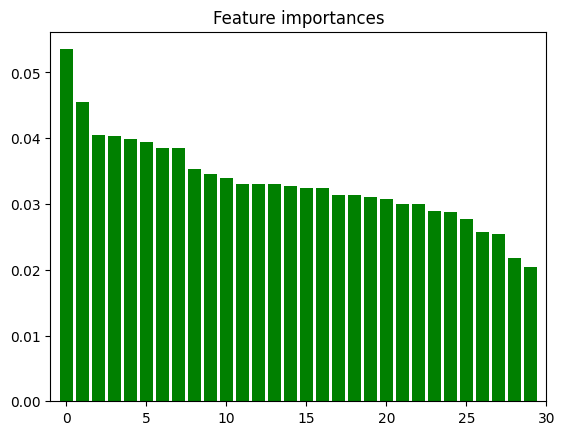

In [ ]:
# Sort the feature importances in descending order
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="g", align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Compute ROC AUC score
from sklearn.metrics import roc_auc_score
y_pred_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", roc_auc)


ROC AUC score: 0.6879169384976968


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9978152238397299
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


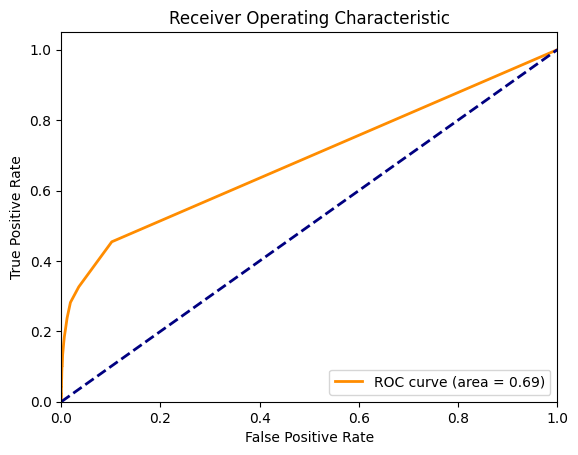

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



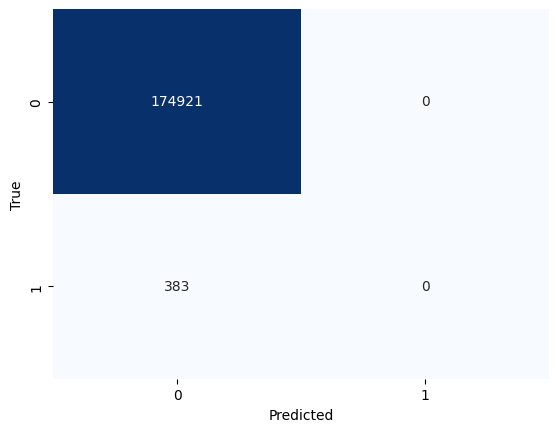

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



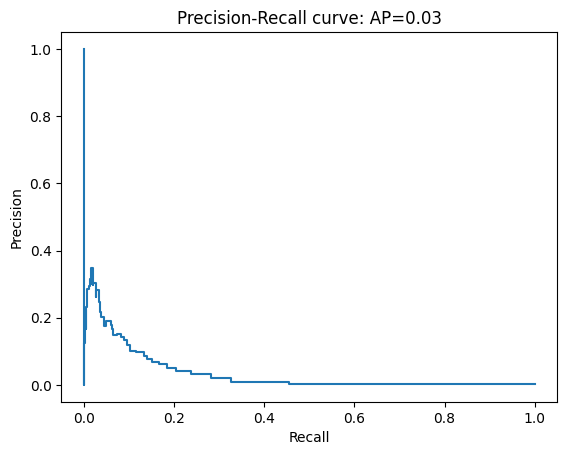

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()
